# Exploratory Data Analysis (EDA)

Analisis data AF dan Non-AF dari folder `Data/af/` dan `Data/non-af/`.

In [4]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

af_folder = 'C:\\Users\\Lenovo\\Documents\\GitHub\\FP_MLxDM\\Data\\af'
nonaf_folder = 'C:\\Users\\Lenovo\\Documents\\GitHub\\FP_MLxDM\\Data\\non-af'

af_files = sorted(glob.glob(os.path.join(af_folder, '*_data.csv')))
nonaf_files = sorted(glob.glob(os.path.join(nonaf_folder, '*_data.csv')))

print(f'AF files: {len(af_files)}')
print(f'Non-AF files: {len(nonaf_files)}')

AF files: 19
Non-AF files: 16


## Contoh Data AF dan Non-AF

In [5]:
# Load satu contoh AF dan Non-AF
df_af = pd.read_csv(af_files[0])
df_nonaf = pd.read_csv(nonaf_files[0])

print('AF columns:', df_af.columns.tolist())
print('Non-AF columns:', df_nonaf.columns.tolist())

df_af.head()

AF columns: ['Time', 'PPG', 'ECG', 'resp']
Non-AF columns: ['Time', 'PPG', 'ECG', 'resp']


,Time,PPG,ECG,resp
0,0.000,0.537634,0.425781,-0.029340
1,0.008,0.534702,0.404297,-0.036675
2,0.016,0.531769,0.400391,-0.044010
3,0.024,0.528837,0.400391,-0.053790
4,0.032,0.524927,0.419922,-0.061125


In [6]:
df_nonaf.head()

,Time,PPG,ECG,resp
0,0.000,0.410557,0.314453,0.717097
1,0.008,0.400782,0.285156,0.720787
2,0.016,0.391007,0.300781,0.723247
3,0.024,0.382209,0.304688,0.726937
4,0.032,0.372434,0.294922,0.730627


## Statistik Deskriptif

In [7]:
print('AF stats:')
display(df_af.describe())

print('Non-AF stats:')
display(df_nonaf.describe())

AF stats:


,Time,PPG,ECG,resp
count,150001.000000,150001.000000,150001.000000,150001.000000
mean,600.000000,0.487731,0.498328,0.042681
std,346.413626,0.097388,0.151807,0.301087
min,0.000000,0.000000,-0.498047,-0.457213
25%,300.000000,0.416422,0.419922,-0.166259
50%,600.000000,0.483871,0.494141,-0.129584
75%,900.000000,0.557185,0.519531,0.224939
max,1200.000000,0.956012,1.500000,0.960880


Non-AF stats:


,Time,PPG,ECG,resp
count,150001.000000,150001.000000,150001.000000,150001.000000
mean,600.000000,0.457151,0.338384,0.315383
std,346.413626,0.157625,0.107471,0.222309
min,0.000000,0.000000,-0.279297,-0.129151
25%,300.000000,0.321603,0.285156,0.151292
50%,600.000000,0.427175,0.304688,0.194342
75%,900.000000,0.590420,0.355469,0.484625
max,1200.000000,1.000000,1.500000,1.129151


## Visualisasi Distribusi Sinyal

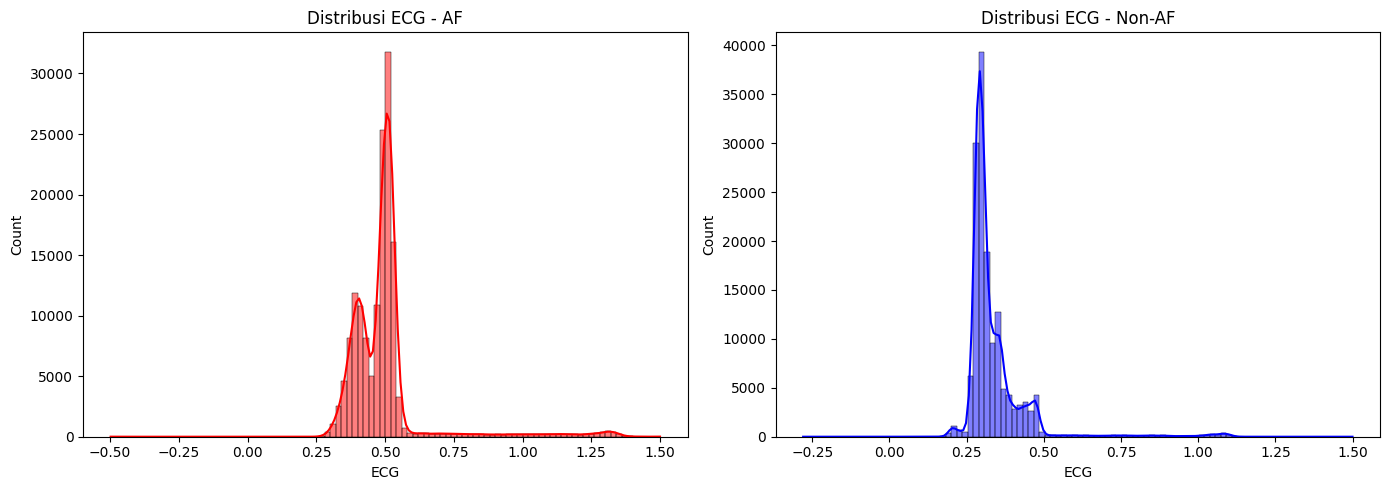

In [8]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_af['ECG'], bins=100, color='red', label='AF ECG', kde=True)
plt.title('Distribusi ECG - AF')
plt.xlabel('ECG')

plt.subplot(1, 2, 2)
sns.histplot(df_nonaf['ECG'], bins=100, color='blue', label='Non-AF ECG', kde=True)
plt.title('Distribusi ECG - Non-AF')
plt.xlabel('ECG')

plt.tight_layout()
plt.show()

## Plot Sinyal ECG dan PPG

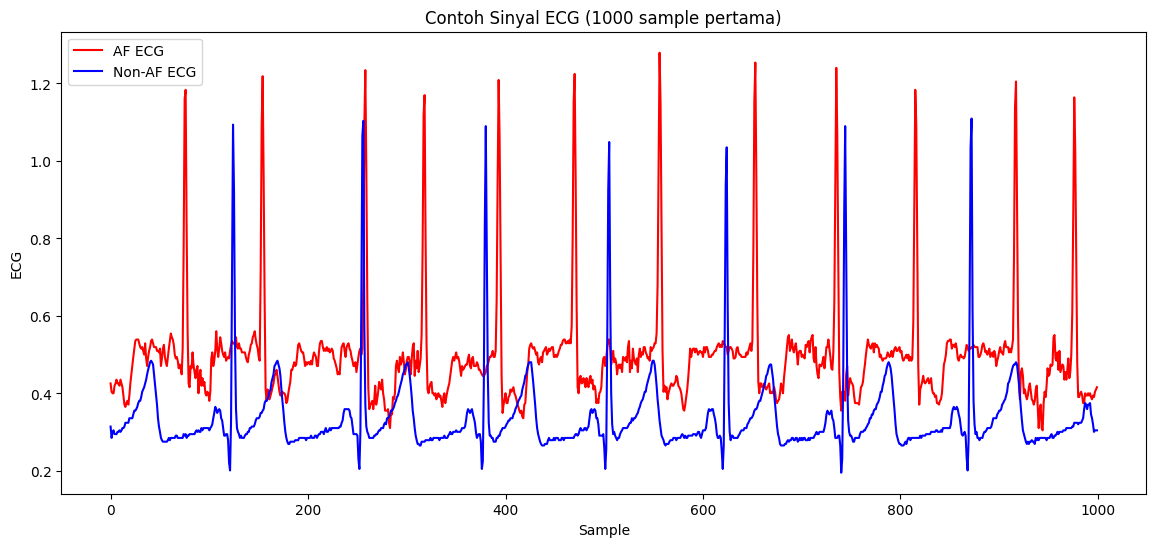

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(df_af['ECG'][:1000], label='AF ECG', color='red')
plt.plot(df_nonaf['ECG'][:1000], label='Non-AF ECG', color='blue')
plt.title('Contoh Sinyal ECG (1000 sample pertama)')
plt.xlabel('Sample')
plt.ylabel('ECG')
plt.legend()
plt.show()

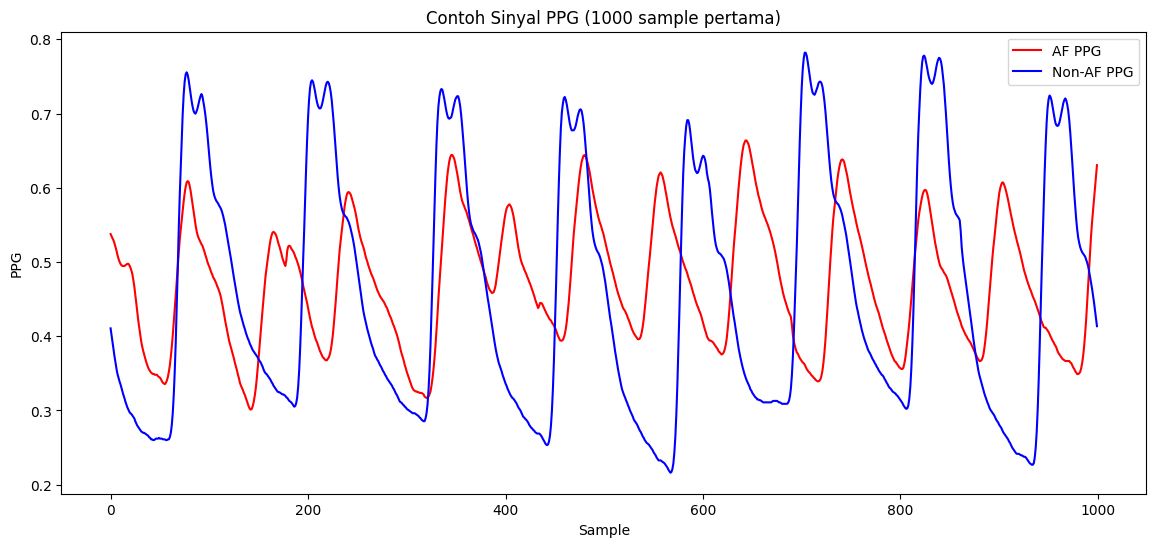

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(df_af['PPG'][:1000], label='AF PPG', color='red')
plt.plot(df_nonaf['PPG'][:1000], label='Non-AF PPG', color='blue')
plt.title('Contoh Sinyal PPG (1000 sample pertama)')
plt.xlabel('Sample')
plt.ylabel('PPG')
plt.legend()
plt.show()

In [ ]:
# Analisis lebih lanjut: Perbandingan statistik antar file AF dan Non-AF
def get_stats(files):
    stats = []
    for f in files:
        df = pd.read_csv(f)
        stats.append(df.describe().loc[['mean', 'std', 'min', 'max']].to_dict())
    return pd.DataFrame(stats)
af_stats = get_stats(af_files)
nonaf_stats = get_stats(nonaf_files)
print('Statistik AF (mean, std, min, max per file):')
display(af_stats)
print('Statistik Non-AF (mean, std, min, max per file):')
display(nonaf_stats)